# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Show plots inline
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Load The Data

In [3]:
# Code task 1
# Load CSV from a local file

df_train = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/df_train_cleaned.csv')

In [4]:
# Code task 2
# Create a dataframe for the data

df_train = pd.DataFrame(df_train)
df_train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,2011,1,17
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2011,1,17
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2011,1,17
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,2011,1,17
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,2011,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38,2013,9,7
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30,2013,9,7
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31,2013,9,7
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12,2013,9,7


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
 9   year             150150 non-null  int64  
 10  month            150150 non-null  int64  
 11  day              150150 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 13.7+ MB


In [6]:
# Code task 3
# Load CSV from a local sales file

sales = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/sales_cleaned.csv')


In [7]:
# Code task 4
# Create a dataframe for the data

sales = pd.DataFrame(sales)
sales

,record_ID,year,month,units_sold,average_price,revenue
0,1,2011,1,20,219,4380
1,2,2011,1,28,219,6132
2,3,2011,1,19,219,4161
3,4,2011,1,44,219,9636
4,5,2011,1,52,219,11388
...,...,...,...,...,...,...
150145,212638,2013,9,38,219,8322
150146,212639,2013,9,30,219,6570
150147,212642,2013,9,31,219,6789
150148,212643,2013,9,12,219,2628


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   record_ID      150150 non-null  int64
 1   year           150150 non-null  int64
 2   month          150150 non-null  int64
 3   units_sold     150150 non-null  int64
 4   average_price  150150 non-null  int64
 5   revenue        150150 non-null  int64
dtypes: int64(6)
memory usage: 6.9 MB


In [9]:
# Code task 5
# Find the columns that aren't in the first DataFrame

different_cols = sales.columns.difference(df_train.columns)
 
# Filter out the columns that are different.
# You could pass in the df2[diff_cols] 
# directly into the merge as well.

data3 = sales[different_cols]

In [10]:
# Code task 6
# Merge two dataframes with only unique columns

df_merged = pd.merge(df_train, data3, left_index=True,
                     right_index=True, how='inner')
df_merged

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,average_price,revenue
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,219,4380
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,219,6132
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,219,4161
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,219,9636
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,2011,1,17,219,11388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38,2013,9,7,219,8322
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30,2013,9,7,219,6570
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31,2013,9,7,219,6789
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12,2013,9,7,219,2628


In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
 9   year             150150 non-null  int64  
 10  month            150150 non-null  int64  
 11  day              150150 non-null  int64  
 12  average_price    150150 non-null  int64  
 13  revenue          150150 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 16.0+ MB


# Explore The Data

# Top Units sold for each of the Store ID
Distribution of units per store ID, shows how quantity (units_sold) for each store ID look like?

In [12]:
df_train_newind = df_merged.set_index('store_id')
df_train_newind

,record_ID,week,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,average_price,revenue
store_id,,,,,,,,,,,,,
8091,1,2011-01-17,216418,99.0375,111.8625,0,0,20,2011,1,17,219,4380
8091,2,2011-01-17,216419,99.0375,99.0375,0,0,28,2011,1,17,219,6132
8091,3,2011-01-17,216425,133.9500,133.9500,0,0,19,2011,1,17,219,4161
8091,4,2011-01-17,216233,133.9500,133.9500,0,0,44,2011,1,17,219,9636
8091,5,2011-01-17,217390,141.0750,141.0750,0,0,52,2011,1,17,219,11388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,212638,2013-09-07,223245,235.8375,235.8375,0,0,38,2013,9,7,219,8322
9984,212639,2013-09-07,223153,235.8375,235.8375,0,0,30,2013,9,7,219,6570
9984,212642,2013-09-07,245338,357.6750,483.7875,1,1,31,2013,9,7,219,6789


In [13]:
df_train_newind.units_sold.sort_values(ascending=False).head()

store_id
9845    2876
9845    1705
9845    1669
9823    1599
8869    1341
Name: units_sold, dtype: int64

# Total Revenue distribution per Store

In [14]:
df_train_newind.revenue.sort_values(ascending=False).head()

store_id
9845    629844
9845    373395
9845    365511
9823    350181
8869    293679
Name: revenue, dtype: int64

Store ID 9845 dominates the units_sold and thus revenue. Store ID's 9845, 9823 and 8869 are among top three for units_sold. 

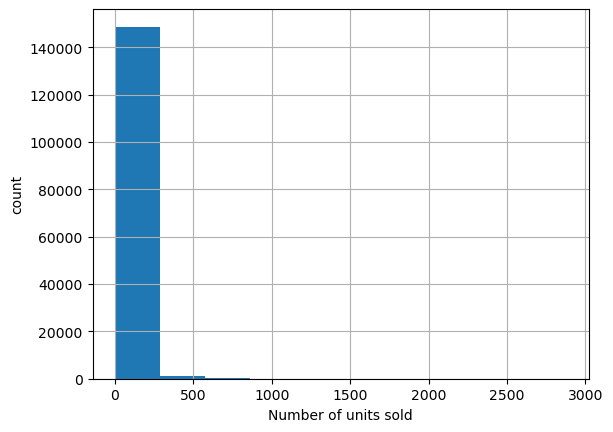

In [15]:
df_train_newind.units_sold.hist(bins = 10)
plt.xlabel('Number of units sold')
plt.ylabel('count');

# Visualizing High Dimensional Data

The basic steps in this process are:

1. Scale the data (important here because our features are heterogenous)
2. Fit the PCA transformation (learn the transformation from the data)
3. Apply the transformation to the data to create the derived features
4. Use the derived features to look for patterns in the data and explore the coefficients

# Scale the data

We only want numeric data here and use scale() to scale the data which returns an ndarray to visualise scaled data. Now we construct a dataframe from the ndarray here and reintroduce the column names.

In [16]:
#Create a new dataframe, `df_train_scale` from `df_merged` whilst setting the index to 'store_id' and drop the week column which contains datetime dtype
df_merged_scale = df_merged.set_index("store_id").drop(columns=["week"])
#Save the store labels (using the index attribute of `df_merged_scale`) into the variable 'df_merged_index'
df_merged_index = df_merged_scale.index
#Save the column names (using the `columns` attribute)` into the variable 'df_merged_columns'
df_merged_columns = df_merged_scale.columns
df_merged_scale.head()

,record_ID,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,average_price,revenue
store_id,,,,,,,,,,,,
8091,1,216418,99.0375,111.8625,0,0,20,2011,1,17,219,4380
8091,2,216419,99.0375,99.0375,0,0,28,2011,1,17,219,6132
8091,3,216425,133.9500,133.9500,0,0,19,2011,1,17,219,4161
8091,4,216233,133.9500,133.9500,0,0,44,2011,1,17,219,9636
8091,5,217390,141.0750,141.0750,0,0,52,2011,1,17,219,11388


In [17]:
df_merged_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150150 entries, 8091 to 9984
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   sku_id           150150 non-null  int64  
 2   total_price      150149 non-null  float64
 3   base_price       150150 non-null  float64
 4   is_featured_sku  150150 non-null  int64  
 5   is_display_sku   150150 non-null  int64  
 6   units_sold       150150 non-null  int64  
 7   year             150150 non-null  int64  
 8   month            150150 non-null  int64  
 9   day              150150 non-null  int64  
 10  average_price    150150 non-null  int64  
 11  revenue          150150 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.9 MB


The above shows what we expect: the columns we want are all numeric and the store_id has been moved to the index.

In [18]:
df_merged_scale = scale(df_merged_scale)

In [19]:
#Code task 2#
#Create a new dataframe from `df_merged_scale` using the column names we saved in `df_merged_columns`
df_merged_scaled_df = pd.DataFrame(df_merged_scale, columns= df_merged_columns)
df_merged_scaled_df.head()

,record_ID,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,average_price,revenue
0,-1.731190,-0.448211,-1.041440,-0.969377,-0.325145,-0.392006,-0.526082,-1.099069,-1.492275,0.145335,0.0,-0.526082
1,-1.731174,-0.448200,-1.041440,-1.084958,-0.325145,-0.392006,-0.393209,-1.099069,-1.492275,0.145335,0.0,-0.393209
2,-1.731158,-0.448129,-0.703495,-0.770322,-0.325145,-0.392006,-0.542691,-1.099069,-1.492275,0.145335,0.0,-0.542691
3,-1.731141,-0.450374,-0.703495,-0.770322,-0.325145,-0.392006,-0.127462,-1.099069,-1.492275,0.145335,0.0,-0.127462
4,-1.731125,-0.436849,-0.634526,-0.706110,-0.325145,-0.392006,0.005411,-1.099069,-1.492275,0.145335,0.0,0.005411


# Verifying the scaling
This is definitely going the extra mile for validating your steps.

First of all, check the mean of the scaled features using panda's mean() DataFrame method.

In [20]:
#Code task 3#
#Call `df_merged_scaled_df`'s `mean()` method
df_merged_scaled_df.mean()

record_ID         -1.938317e-16
sku_id            -4.800837e-17
total_price        1.434582e-16
base_price         2.511862e-16
is_featured_sku    1.665741e-17
is_display_sku    -2.120034e-17
units_sold        -4.372571e-17
year               5.096562e-14
month             -1.135733e-16
day                1.090303e-16
average_price      0.000000e+00
revenue            4.921508e-18
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's std() DataFrame method.

In [21]:
#Code task 4#
#Call `df_merged_scaled_df`'s `std()` method
df_merged_scaled_df.std()

record_ID          1.000003
sku_id             1.000003
total_price        1.000003
base_price         1.000003
is_featured_sku    1.000003
is_display_sku     1.000003
units_sold         1.000003
year               1.000003
month              1.000003
day                1.000003
average_price      0.000000
revenue            1.000003
dtype: float64

scale() uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The std() method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the std() method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [22]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
df_merged_scaled_df.std(ddof=0)

record_ID          1.0
sku_id             1.0
total_price        1.0
base_price         1.0
is_featured_sku    1.0
is_display_sku     1.0
units_sold         1.0
year               1.0
month              1.0
day                1.0
average_price      0.0
revenue            1.0
dtype: float64

There! Now it agrees with scale() and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours. Good practice is to keep validating your work and checking the documentation!

# Calculate the PCA transformation
Fit the PCA transformation using the scaled data.

In [23]:
df_merged_scaled_df.fillna(0, inplace=True)
df_pca = PCA().fit(df_merged_scale)

Plot the cumulative variance ratio with number of components.

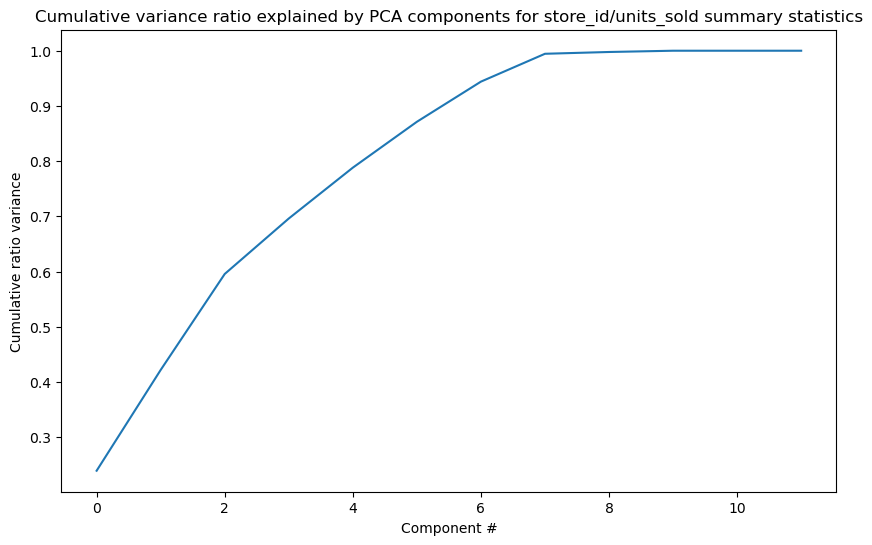

In [24]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component #")
plt.ylabel("Cumulative ratio variance")
plt.title("Cumulative variance ratio explained by PCA components for store_id/units_sold summary statistics");

The first two components seem to account for over 60% of the variance, and the first six for over 90%.

Apply the transformation to the data to obtain the derived features.

In [25]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
df_pca_x = df_pca.transform(df_merged_scale)

In [26]:
df_pca_x.shape

(150150, 12)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (state_pca_x) as x and y coordinates for plotting. Recall the state labels you saved (for this purpose) for subsequent calls to plt.annotate. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained by the two PCA components we're visualizing. Then create an appropriately sized and well-labelled scatterplot to convey all of this information.

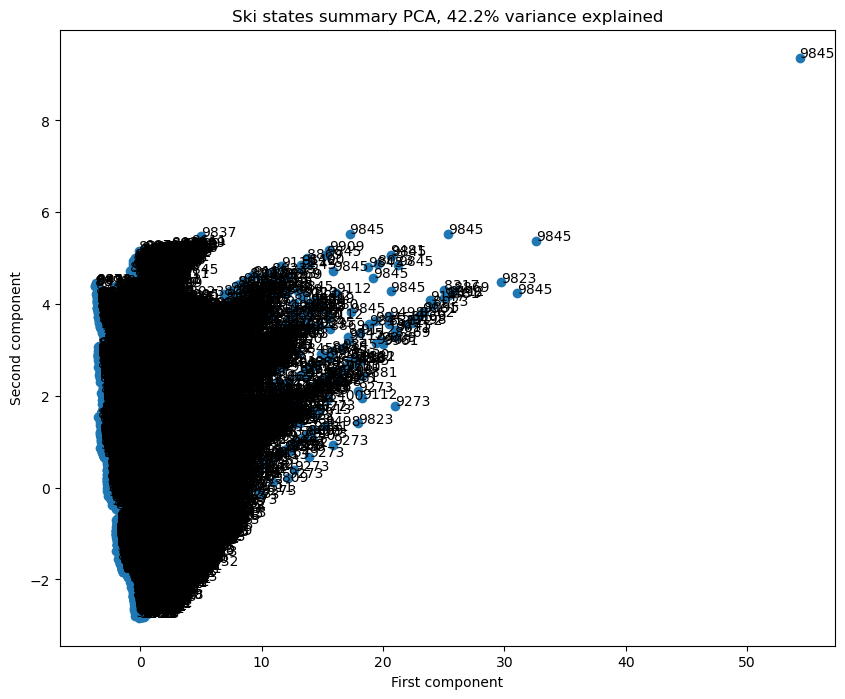

In [27]:
x = df_pca_x[:, 0]
y = df_pca_x[:, 1]
state = df_merged_index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

# Average units sold by sku, store
Here, all point markers for the states are the same size and colour. You've visualized relationships between the states based on features such as the total skiable terrain area, but your ultimate interest lies in units sold. You know units sold for skus in each store, so it might be interesting to see if there's any pattern there.

In [28]:
#Code task 8#
#Calculate the average 'unit sold' price by state
store_avg_price = df_merged.groupby("store_id")["units_sold"].mean()
store_avg_price.head()

store_id
8023    108.600000
8058     52.747692
8063     34.714980
8091     32.805983
8094     41.821795
Name: units_sold, dtype: float64

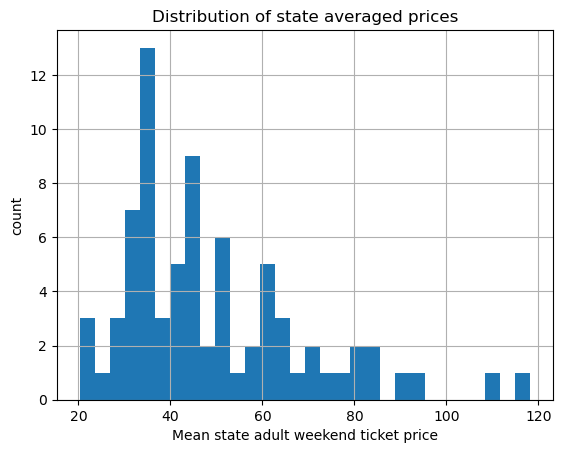

In [29]:
store_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

In [30]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by df_pca_x[:, 0],
#and the second by df_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `df_merged_index`
pca_df = pd.DataFrame({'PC1': df_pca_x[:, 0], 'PC2': df_pca_x[:, 1]}, index=df_merged_index)
pca_df.head()

,PC1,PC2
store_id,,
8091,-0.135737,-2.484989
8091,0.041686,-2.513936
8091,-0.315042,-2.248816
8091,0.148275,-2.166189
8091,0.255342,-2.078606


In [31]:
# our store_avg_price also have state as an index
store_avg_price.head()

store_id
8023    108.600000
8058     52.747692
8063     34.714980
8091     32.805983
8094     41.821795
Name: units_sold, dtype: float64

That worked, and we have store_id as an index.

In [32]:
# we can also cast it to a dataframe using Series' to_frame() method:
store_avg_price.to_frame().head()

,units_sold
store_id,
8023,108.600000
8058,52.747692
8063,34.714980
8091,32.805983
8094,41.821795


Now we concatenate both parts on axis 1 and using the indexes.

In [33]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, store_avg_price], axis=0)
pca_df.head()

,PC1,PC2,units_sold
store_id,,,
8091,-0.135737,-2.484989,NaN
8091,0.041686,-2.513936,NaN
8091,-0.315042,-2.248816,NaN
8091,0.148275,-2.166189,NaN
8091,0.255342,-2.078606,NaN


Add another column where you seperate these prices into quartiles; that might show something.

In [34]:
pca_df['Quartile'] = pd.qcut(pca_df.units_sold, q=4, precision=1)
pca_df.head()

,PC1,PC2,units_sold,Quartile
store_id,,,,
8091,-0.135737,-2.484989,NaN,NaN
8091,0.041686,-2.513936,NaN,NaN
8091,-0.315042,-2.248816,NaN,NaN
8091,0.148275,-2.166189,NaN,NaN
8091,0.255342,-2.078606,NaN,NaN


In [35]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1            float64
PC2            float64
units_sold     float64
Quartile      category
dtype: object

This looks great. We have just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so we'll just print out any rows that have any null values, expecting an empty DataFrame.

In [36]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,units_sold,Quartile
store_id,,,,
8091,-0.135737,-2.484989,NaN,NaN
8091,0.041686,-2.513936,NaN,NaN
8091,-0.315042,-2.248816,NaN,NaN
8091,0.148275,-2.166189,NaN,NaN
8091,0.255342,-2.078606,NaN,NaN
...,...,...,...,...
9890,NaN,NaN,59.554438,"(43.4, 60.6]"
9909,NaN,NaN,66.397802,"(60.6, 118.3]"
9954,NaN,NaN,34.275566,"(34.2, 43.4]"


Because Quartile is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [37]:
pca_df['units_sold'].fillna(pca_df.units_sold.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.iloc[0]

PC1           -0.135737
PC2           -2.484989
units_sold    49.332157
Quartile             NA
Name: 8091, dtype: object

You now have enough information to recreate the scatterplot, now adding marker size for units sold and colour for the discrete quartile.

# Feature correlation heatmap
A great way to gain a high level view of relationships amongst the features.

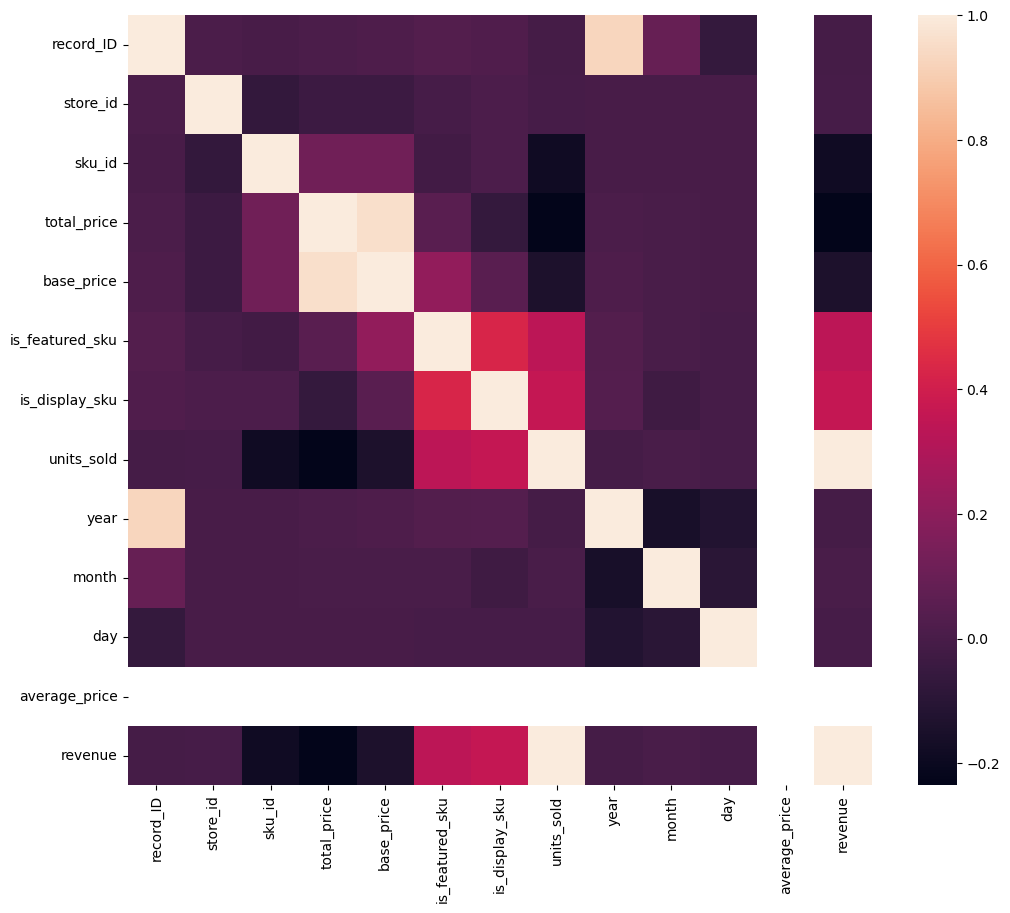

In [38]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(df_merged.corr(numeric_only=True));

# Scatterplots of numeric features against units sold

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. We now create a series of scatterplots to really dive into how units sold varies with other numeric features.

In [51]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'units_sold', data=df_merged, alpha=0.5)
        ax.set(xlabel=col, ylabel='units_sold')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [52]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `df_merged` that
#are _not_ any of 'record_id', 'store_id', 'sku_id', 'units_sold'
features = [x for x in df_merged.columns if x not in ['record_id', 'store_id', 'sku_id', 'units_sold']]

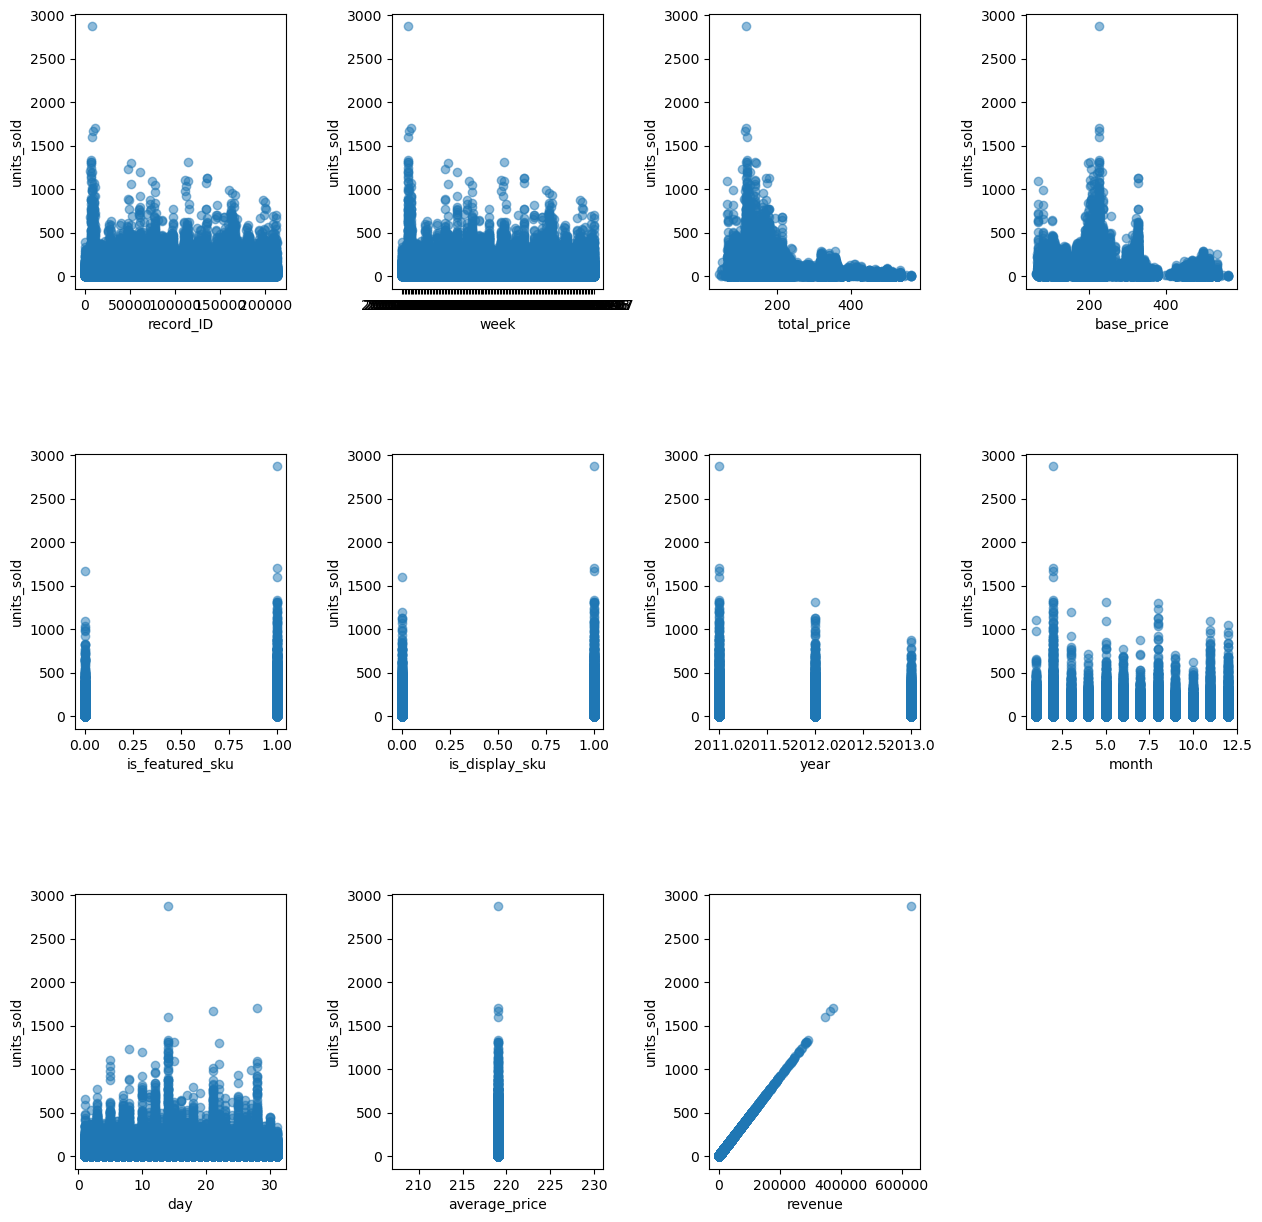

In [53]:
scatterplots(features, ncol=4, figsize=(15, 15))

# SUMMARY: 
We created a scatterplots of numeric features against units sold to identify patterns. Results shows there’s a strong positive correlation between units_sold and revenue (as expected). year, month and day seems very useful. is_featured_sku and is_display_sku appear quite similar.